# Bayesian Optimization

https://botorch.org/docs/overview

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import torch

from gpytorch.mlls import ExactMarginalLogLikelihood   # Marginal log likelihood for GP training
from gpytorch.likelihoods import FixedNoiseGaussianLikelihood  # Likelihood for GP

from botorch.models import SingleTaskGP  # Gaussian Process
from botorch.fit import fit_gpytorch_mll  # Fit GP model
from botorch.acquisition import LogExpectedImprovement  # Acquisition function
from botorch.optim import optimize_acqf  # Acquisition function optimization

In [3]:
# True function
def objective_function(x):
    return (
        0.0030 * x**5
        - 0.0139 * x**4
        - 0.1232 * x**3
        + 0.4106 * x**2
        + 1.0011 * x
        + 3.5957
    )

In [4]:
bounds = torch.tensor([[-5.6], [6.5]], dtype=torch.double)
n_init = 1
train_x = torch.tensor([0.0], dtype=torch.double).view(n_init, 1)
train_obj = objective_function(train_x)

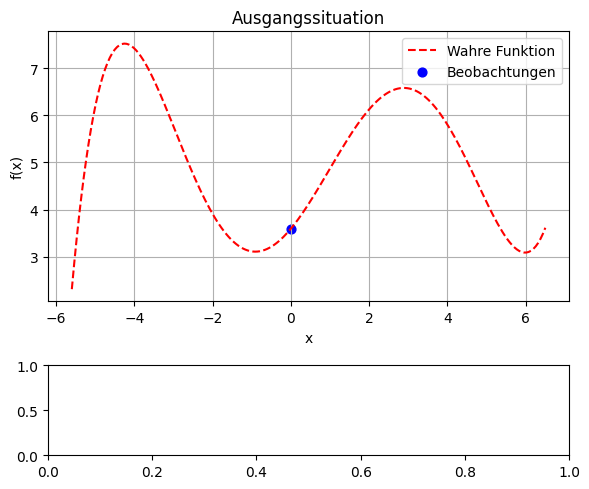

In [5]:
# Visualization only
def visualize_step(model=None, acq_func=None, candidate=None, title="Bayesian Optimization"):

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 5), gridspec_kw={'height_ratios': [3, 1]})
    x_plot = torch.linspace(bounds[0].item(), bounds[1].item(), 200, dtype=torch.double).unsqueeze(-1)
    
    # Main plot: GP + true function
    x_np = x_plot.numpy()
    y_true = np.array([objective_function(x) for x in x_np.flatten()])
    
    ax1.plot(x_np, y_true, 'r--', label='Wahre Funktion')
    ax1.scatter(train_x.numpy(), train_obj.numpy(), color='blue', marker='o', s=40, label='Beobachtungen')
    
    # Visualize GP model
    if model is not None:
        model.eval()
        with torch.no_grad():
            posterior = model.posterior(x_plot)
            mean = posterior.mean.numpy()
            lower, upper = posterior.mvn.confidence_region()
            lower, upper = lower.numpy(), upper.numpy()
            
            ax1.plot(x_np, mean, 'b-', label='GP Mean')
            ax1.fill_between(x_np.flatten(), lower.flatten(), upper.flatten(), 
                             alpha=0.3, color='blue', label='GP 95% Konfidenzintervall')
    
    # Display next candidate point
    if candidate is not None:
        cand_y = objective_function(candidate).item()
        ax1.scatter(candidate.item(), cand_y, color='green', marker='X', s=100, label='Nächster Punkt')
    
    ax1.set_title(title)
    ax1.legend()
    ax1.grid(True)
    ax1.set_xlabel('x')
    ax1.set_ylabel('f(x)')
    
    # Acquisition Function Plot
    if acq_func is not None:
        with torch.no_grad():
            acq_values = acq_func(x_plot.unsqueeze(1)).numpy()
        
        ax2.plot(x_np, acq_values, 'g-', label='Acquisition-Funktion')
        
        if candidate is not None:
            ax2.axvline(x=candidate.item(), color='r', linestyle='--', label='Maximaler Acquisition-Wert')
        
        ax2.set_xlabel('x')
        ax2.set_ylabel('Acquisition-Wert')
        ax2.legend()
        ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

visualize_step(title="Ausgangssituation")

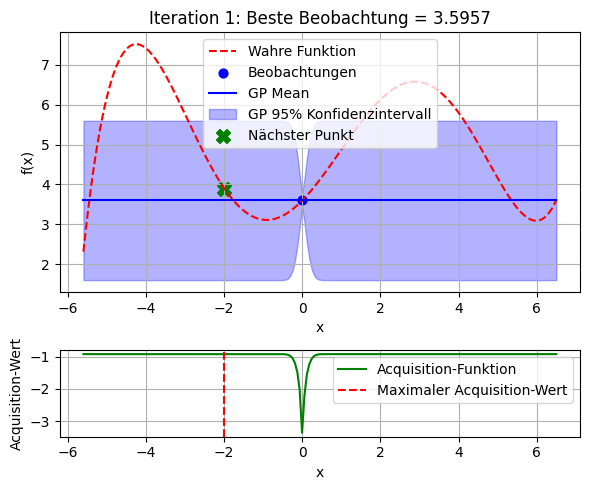

Iteration 1: Beste Beobachtung = 3.8940


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


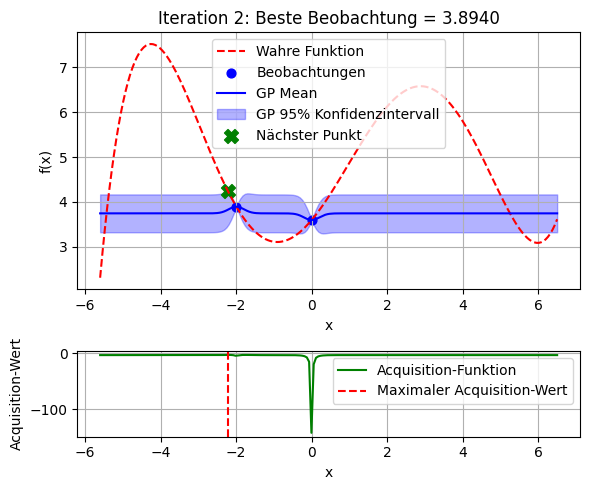

Iteration 2: Beste Beobachtung = 4.2370


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


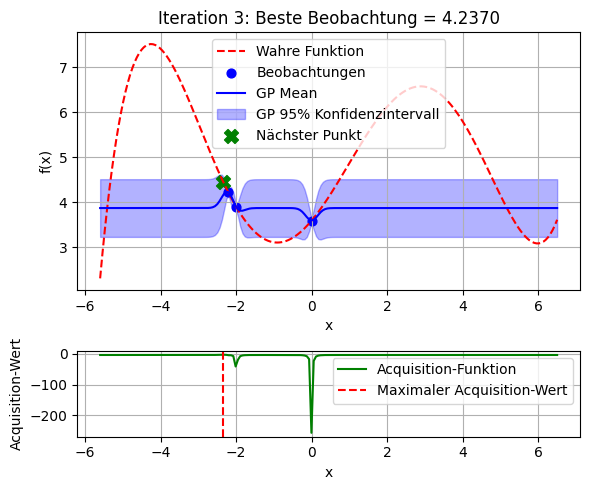

Iteration 3: Beste Beobachtung = 4.4597


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


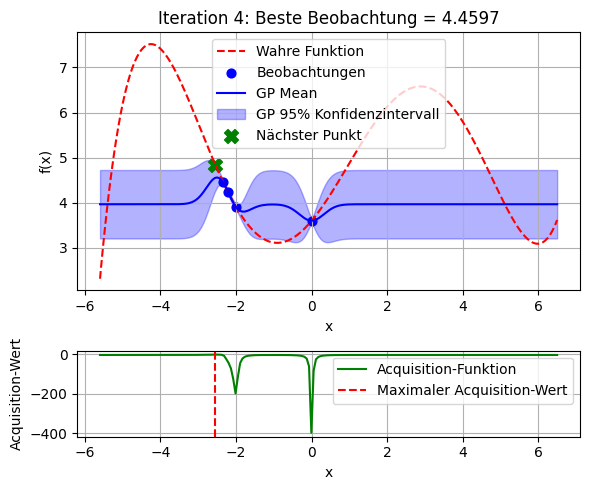

Iteration 4: Beste Beobachtung = 4.8369


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


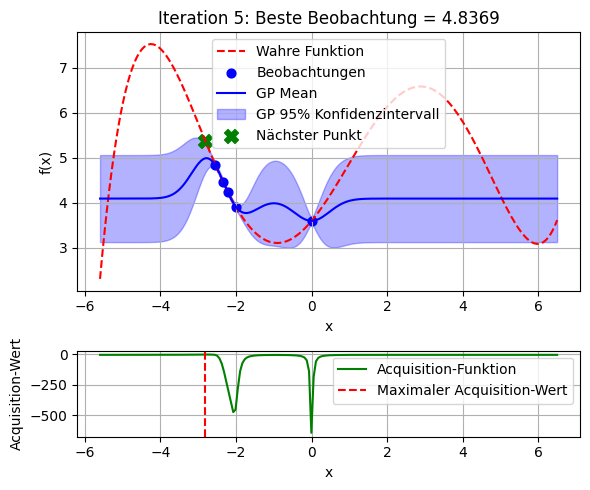

Iteration 5: Beste Beobachtung = 5.3802


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


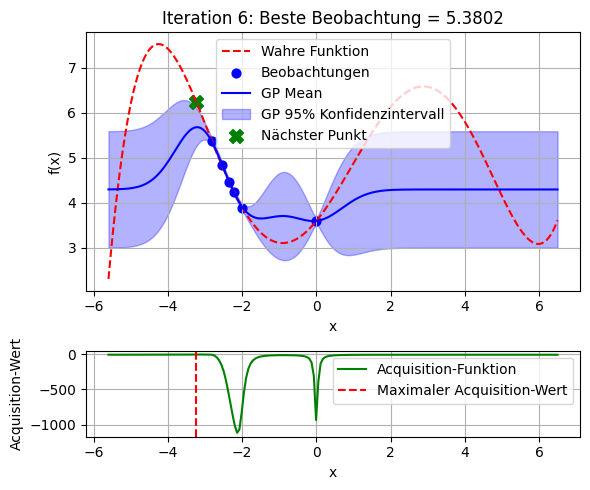

Iteration 6: Beste Beobachtung = 6.2416


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


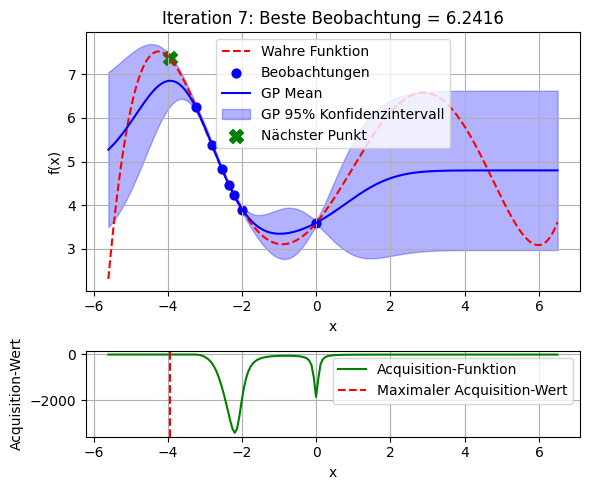

Iteration 7: Beste Beobachtung = 7.3664


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


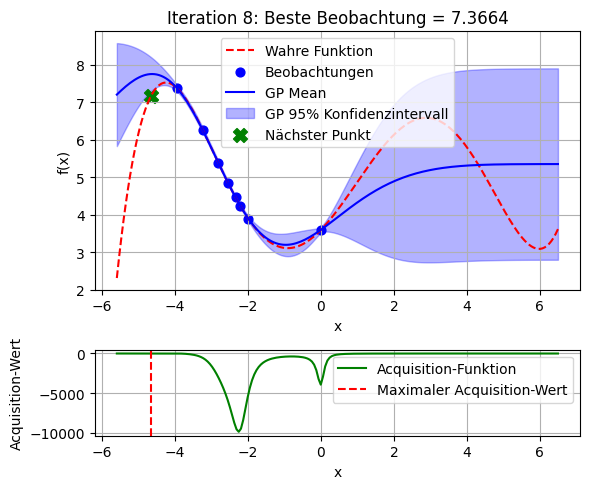

Iteration 8: Beste Beobachtung = 7.3664


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


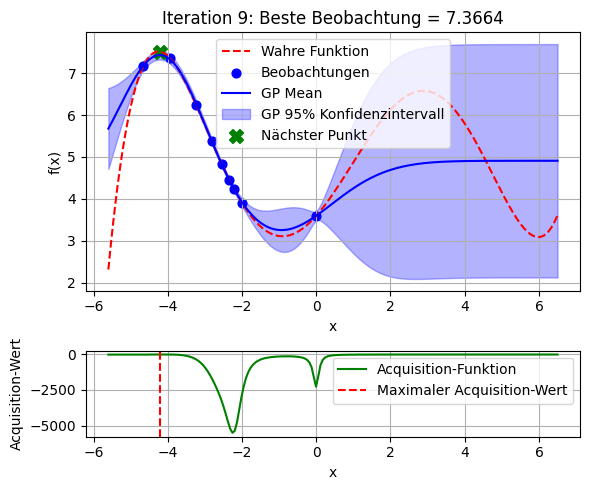

Iteration 9: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


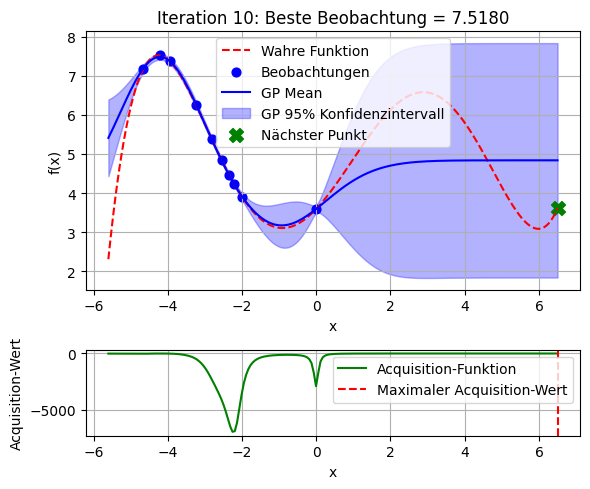

Iteration 10: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


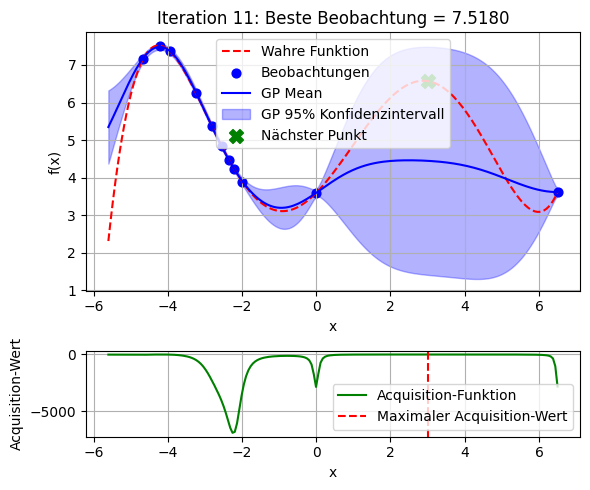

Iteration 11: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


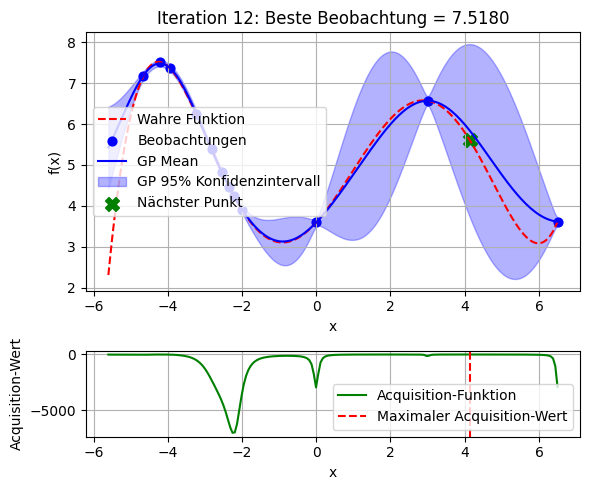

Iteration 12: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


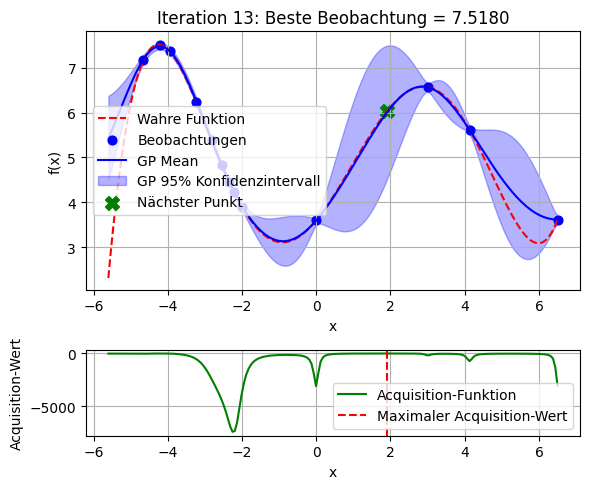

Iteration 13: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


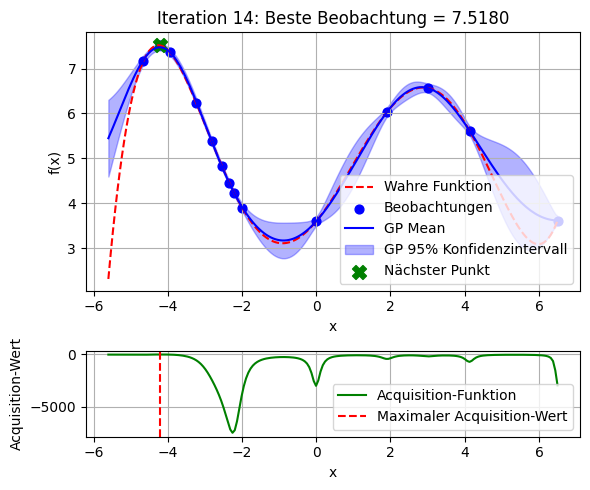

Iteration 14: Beste Beobachtung = 7.5180


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


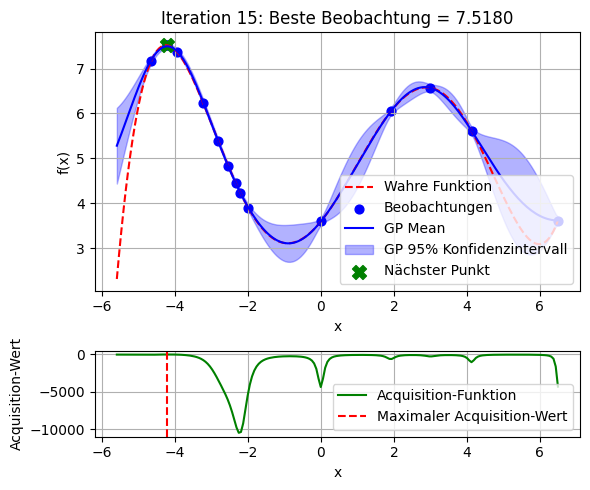

Iteration 15: Beste Beobachtung = 7.5181


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


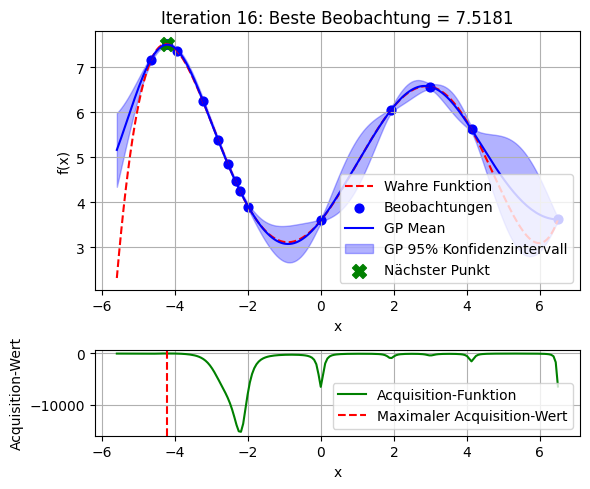

Iteration 16: Beste Beobachtung = 7.5184


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


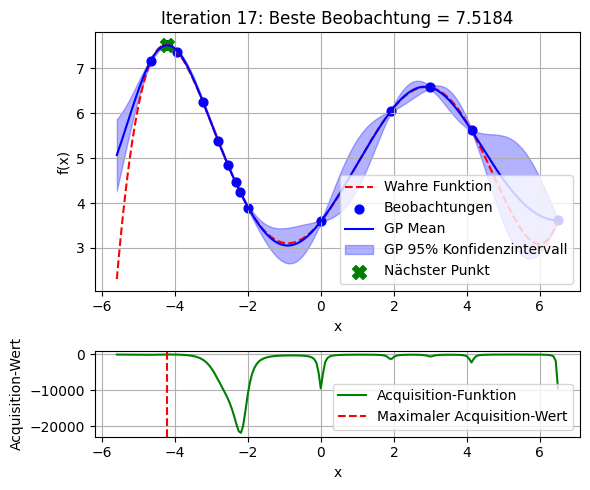

Iteration 17: Beste Beobachtung = 7.5187


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


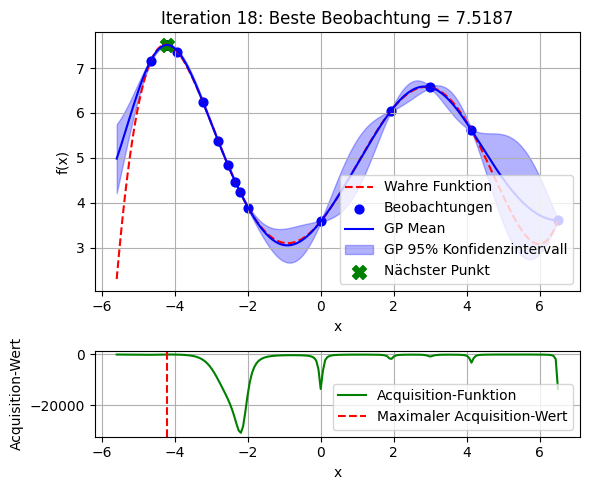

Iteration 18: Beste Beobachtung = 7.5189


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


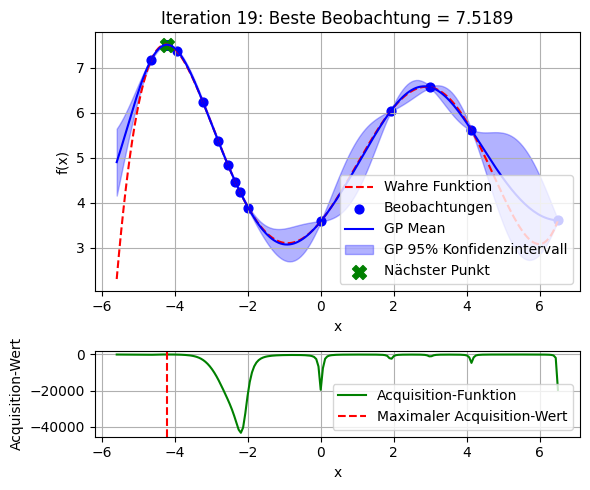

Iteration 19: Beste Beobachtung = 7.5192


/Users/julian/Library/CloudStorage/OneDrive-StudentsRWTHAachenUniversity/03 Research/02 BA/.venv/lib/python3.12/site-packages/botorch/models/utils/assorted.py:264: InputDataWarning: Data (input features) is not contained to the unit cube. Please consider min-max scaling the input data.
  check_min_max_scaling(


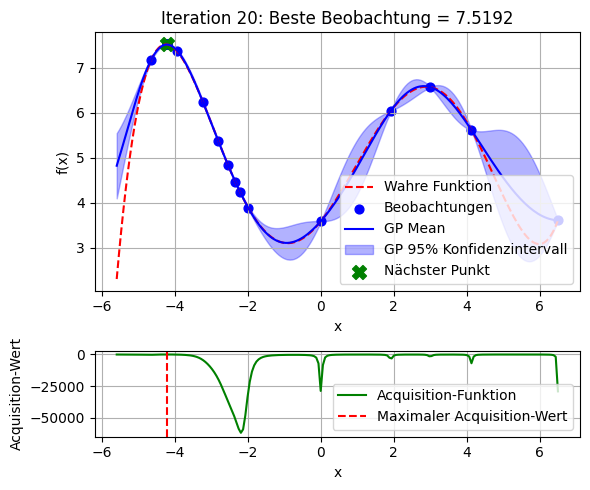

Iteration 20: Beste Beobachtung = 7.5195


In [6]:
# Funktion zum Erstellen und Training des GP-Modells
def initialize_model(train_x, train_obj):

    model = SingleTaskGP(train_x, train_obj)
    
    mll = ExactMarginalLogLikelihood(model.likelihood, model)
    
    fit_gpytorch_mll(mll)
    
    return model

# Hauptschleife der Bayesian Optimization
def bayesian_optimization_step(train_x, train_obj):
    # GP-Modell trainieren
    model = initialize_model(train_x, train_obj)
    
    # Den besten beobachteten Wert als Referenz nehmen
    best_f = train_obj.max().item()
    
    # Expected Improvement als Acquisition-Funktion
    EI = LogExpectedImprovement(model=model, best_f=best_f)
    
    # Optimiere die Acquisition-Funktion
    candidate, acq_value = optimize_acqf(
        acq_function=EI,
        bounds=bounds,
        q=1,  # Anzahl der Kandidaten
        num_restarts=10,  # Anzahl der Restarts
        raw_samples=100,  # Anzahl der Samples für die Initialisierung
    )
    
    # Visualisiere den aktuellen Zustand mit GP und Acquisition-Funktion
    visualize_step(
        model=model, 
        acq_func=EI, 
        candidate=candidate, 
        title=f"Iteration {len(train_x)}: Beste Beobachtung = {best_f:.4f}"
    )
    
    # Evaluiere den neuen Punkt
    new_x = candidate.detach()  # Konvertiere in Tensor
    new_obj = objective_function(new_x)  # Berechne den Funktionswert
    
    # Aktualisiere die Trainingsdaten
    train_x = torch.cat([train_x, new_x]) # Füge den neuen Punkt hinzu
    train_obj = torch.cat([train_obj, new_obj]) # Füge den neuen Funktionswert hinzu
    
    return train_x, train_obj

n_iterations = 20
best_values = [train_obj.max().item()]

for i in range(n_iterations):
    train_x, train_obj = bayesian_optimization_step(train_x, train_obj)
    
    best_values.append(train_obj.max().item())
    
    print(f"Iteration {i+1}: Beste Beobachtung = {best_values[-1]:.4f}")